In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

cluster_data_df = pd.read_csv(r"C:\Users\Tombra\Desktop\mini-project-III\cluster_data.csv", sep=",")

cluster_data_df

,cust_id,avg(amount/tran),credit_balance,savings_balance,checking_balance,income,age,years_with_bank,nbr_children,gender,city_name
0,1362480,269.266706,20.00,1187.97,86.86,50890,33,3,2,M,New York City
1,1362484,381.386000,369.72,2122.17,95.32,10053,42,2,0,F,Denver
2,1362485,278.479306,1100.00,0.00,45.49,22690,25,4,0,F,New York City
3,1362486,98.289600,0.00,116.24,3312.27,10701,76,6,0,F,Dallas
4,1362487,211.563389,1548.23,12.89,1401.21,6605,71,1,0,M,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...
637,1363486,0.000000,1.00,0.00,0.00,39942,41,1,5,F,Honolulu
638,1363490,2.853333,0.00,2301.53,0.00,0,15,7,0,F,Honolulu
639,1363492,1103.970502,6869.00,1116.10,106.14,142274,54,4,0,M,Dallas
640,1363493,147.857778,1.00,553.61,2053.90,30068,69,5,0,M,Houston


In [13]:
df_encoded = pd.get_dummies(cluster_data_df, prefix=None, columns=['city_name'])
df_encoded = pd.get_dummies(df_encoded, columns=['gender'], drop_first=True) #binary
df_encoded.head()

,cust_id,avg(amount/tran),credit_balance,savings_balance,checking_balance,income,age,years_with_bank,nbr_children,city_name_Albuquerque,...,city_name_St Louis,city_name_St Paul,city_name_Tampa,city_name_Toledo,city_name_Tucson,city_name_Tulsa,city_name_Virginia Beach,city_name_Washington,city_name_Wichita,gender_M
0,1362480,269.266706,20.00,1187.97,86.86,50890,33,3,2,0,...,0,0,0,0,0,0,0,0,0,1
1,1362484,381.386000,369.72,2122.17,95.32,10053,42,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1362485,278.479306,1100.00,0.00,45.49,22690,25,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1362486,98.289600,0.00,116.24,3312.27,10701,76,6,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1362487,211.563389,1548.23,12.89,1401.21,6605,71,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
#Scale
scaler = StandardScaler().set_output(transform="pandas")
df_scaled = scaler.fit_transform(df_encoded)
df_scaled.head()

,cust_id,avg(amount/tran),credit_balance,savings_balance,checking_balance,income,age,years_with_bank,nbr_children,city_name_Albuquerque,...,city_name_St Louis,city_name_St Paul,city_name_Tampa,city_name_Toledo,city_name_Tucson,city_name_Tulsa,city_name_Virginia Beach,city_name_Washington,city_name_Wichita,gender_M
0,-1.713821,0.006276,-0.659356,0.209894,-0.384897,1.303330,-0.505884,-0.303070,1.180344,-0.104993,...,-0.088596,-0.088596,-0.055902,-0.088596,-0.104993,-0.104993,-0.039498,-0.097129,-0.055902,1.188921
1,-1.700297,0.407227,-0.385498,0.739195,-0.376838,-0.580153,-0.028816,-0.674388,-0.632529,-0.104993,...,-0.088596,-0.088596,-0.055902,-0.088596,-0.104993,-0.104993,-0.039498,-0.097129,-0.055902,-0.841099
2,-1.696916,0.039221,0.186369,-0.463189,-0.424306,0.002690,-0.929945,0.068249,-0.632529,-0.104993,...,-0.088596,-0.088596,-0.055902,-0.088596,-0.104993,-0.104993,-0.039498,-0.097129,-0.055902,-0.841099
3,-1.693535,-0.605156,-0.675017,-0.397330,2.687645,-0.550266,1.773444,0.810885,-0.632529,-0.104993,...,-0.088596,-0.088596,-0.055902,-0.088596,-0.104993,-0.104993,-0.039498,-0.097129,-0.055902,-0.841099
4,-1.690154,-0.200077,0.537368,-0.455886,0.867159,-0.739182,1.508406,-1.045707,-0.632529,-0.104993,...,-0.088596,-0.088596,-0.055902,-0.088596,-0.104993,-0.104993,-0.039498,-0.097129,-0.055902,1.188921


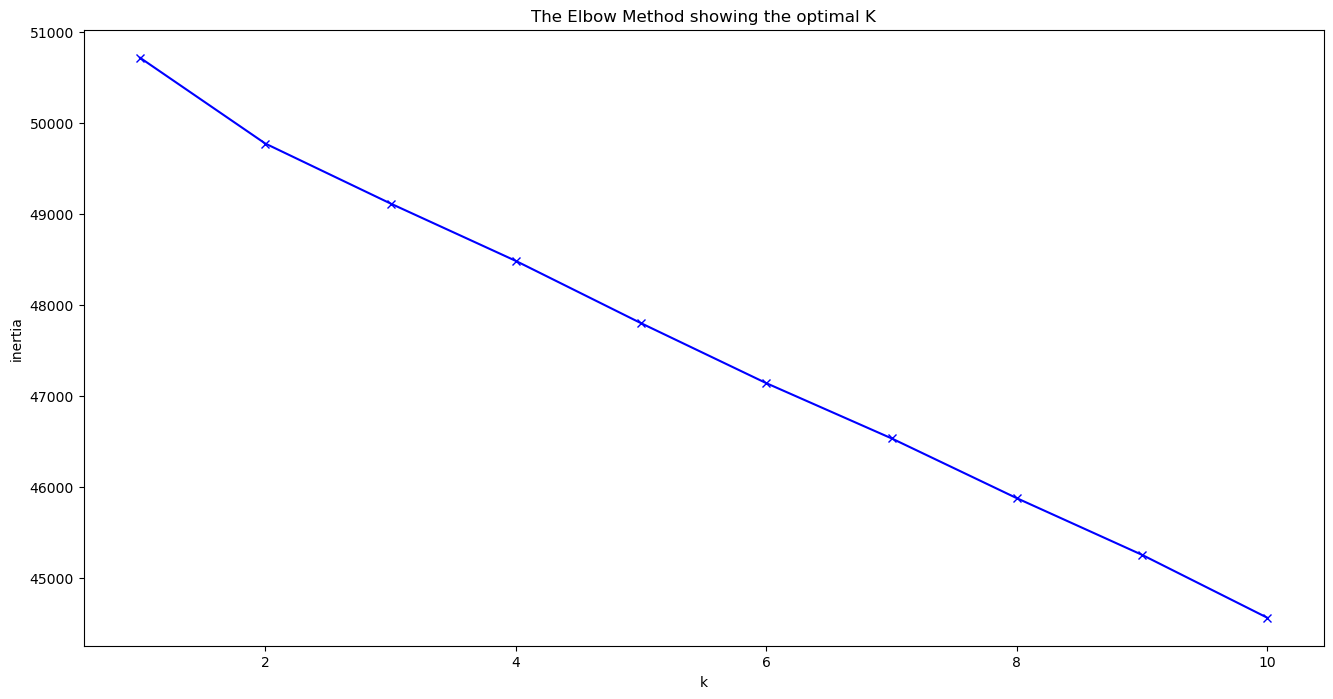

In [15]:
#elbow method
inertias = []
K = range(1,11) #run K-means with K ranging from 1 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    inertias.append(kmeanModel.inertia_)
    
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

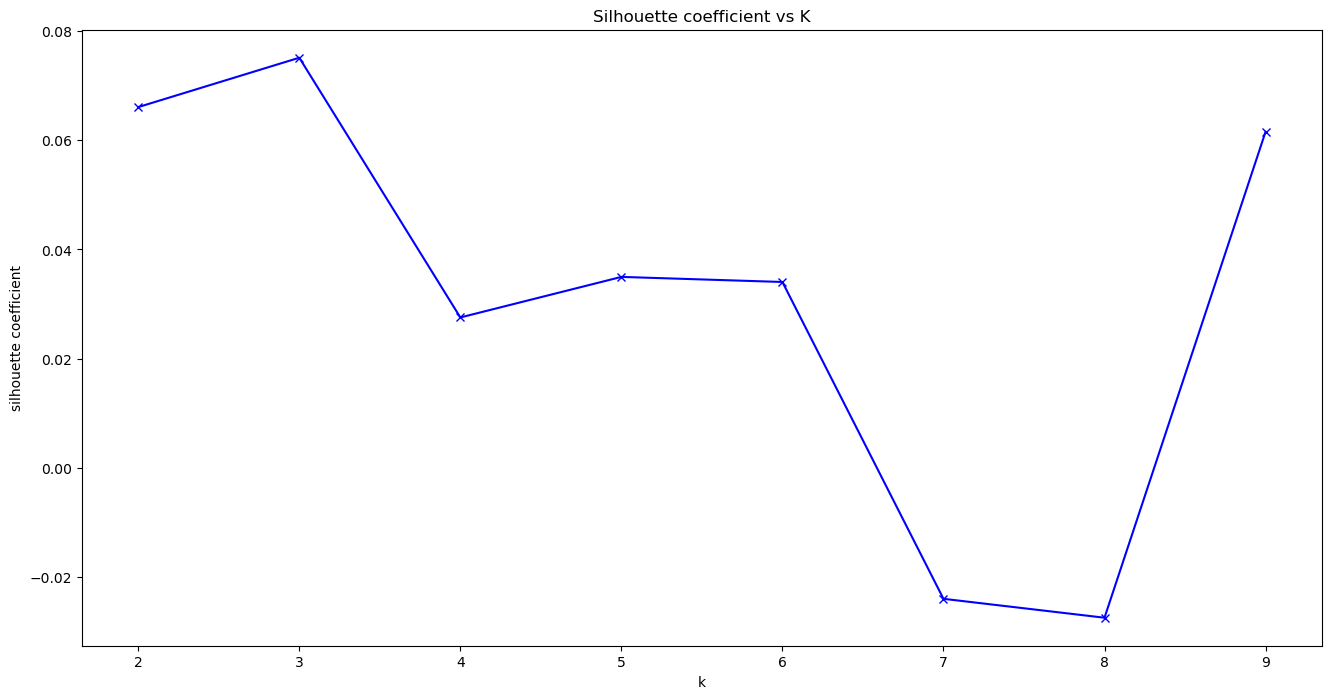

In [16]:
#Silhouette Method
from sklearn.metrics import silhouette_score

silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    label=kmeanModel.predict(df_scaled)
    silhouettes.append(silhouette_score(df_scaled,label))
    
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [17]:
#Kmeans with 4 clusters
model = KMeans(5)
model.fit(df_scaled)

#create a df with the original data but with the assigned cluster label
df_with_clusters = cluster_data_df.copy()
df_with_clusters['label'] = model.predict(df_scaled)
df_with_clusters.head()

,cust_id,avg(amount/tran),credit_balance,savings_balance,checking_balance,income,age,years_with_bank,nbr_children,gender,city_name,label
0,1362480,269.266706,20.00,1187.97,86.86,50890,33,3,2,M,New York City,1
1,1362484,381.386000,369.72,2122.17,95.32,10053,42,2,0,F,Denver,1
2,1362485,278.479306,1100.00,0.00,45.49,22690,25,4,0,F,New York City,1
3,1362486,98.289600,0.00,116.24,3312.27,10701,76,6,0,F,Dallas,1
4,1362487,211.563389,1548.23,12.89,1401.21,6605,71,1,0,M,Los Angeles,1


In [25]:
df_with_clusters['label'].value_counts()

1    508
3    108
2     11
0      9
4      6
Name: label, dtype: int64

In [26]:
pca = PCA(n_components=2).set_output(transform="pandas")
df_pca = pca.fit_transform(df_scaled) #enconded and scaled data (that was passed into clustering algo)
df_pca.head()

,pca0,pca1
0,0.674793,-0.463584
1,-0.172426,1.181873
2,-0.510574,0.420499
3,0.772526,2.480690
4,0.162017,0.533372


In [29]:
df_pca_with_clusters = df_pca.copy()
df_pca_with_clusters['label'] = df_with_clusters['label']
df_pca_with_clusters.head()

,pca0,pca1,label
0,0.674793,-0.463584,1
1,-0.172426,1.181873,1
2,-0.510574,0.420499,1
3,0.772526,2.480690,1
4,0.162017,0.533372,1


In [30]:
#to visualize centroids in PCA space, we also need to transform them.
pca_centroids = pca.transform(model.cluster_centers_)
pca_centroids

,pca0,pca1
0,-0.983180,0.561463
1,-0.504796,0.014704
2,-0.840520,2.169044
3,2.564941,-0.390375
4,-0.413833,0.963053


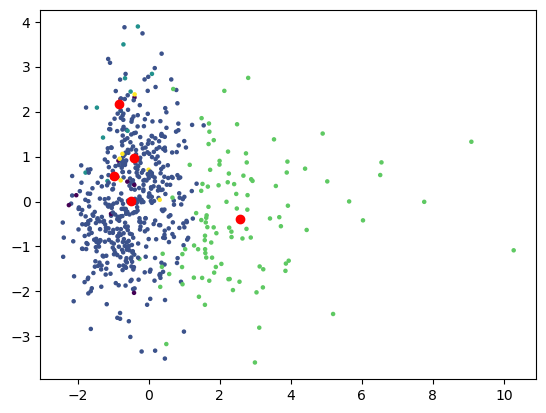

In [32]:
plt.scatter(df_pca_with_clusters['pca0'], df_pca_with_clusters['pca1'], c=df_pca_with_clusters['label'], s=5)
plt.scatter(pca_centroids['pca0'], pca_centroids['pca1'], c='red')

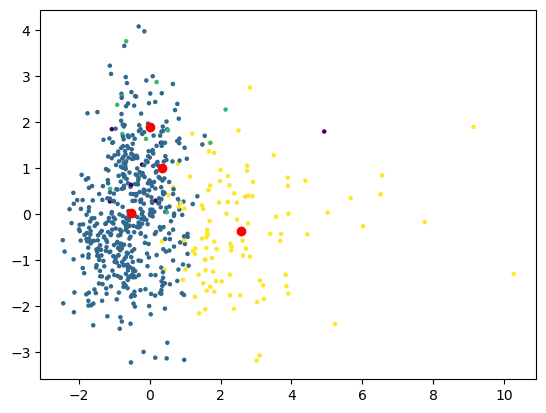

In [46]:
#Kmeans with 4 clusters
model = KMeans(4)
model.fit(df_scaled)

#create a df with the original data but with the assigned cluster label
df_with_clusters = cluster_data_df.copy()
df_with_clusters['label'] = model.predict(df_scaled)

pca = PCA(n_components=2).set_output(transform="pandas")
df_pca = pca.fit_transform(df_scaled) #enconded and scaled data (that was passed into clustering algo)

df_pca_with_clusters = df_pca.copy()
df_pca_with_clusters['label'] = df_with_clusters['label']

#to visualize centroids in PCA space, we also need to transform them.
pca_centroids = pca.transform(model.cluster_centers_)

plt.scatter(df_pca_with_clusters['pca0'], df_pca_with_clusters['pca1'], c=df_pca_with_clusters['label'], s=5)
plt.scatter(pca_centroids['pca0'], pca_centroids['pca1'], c='red')



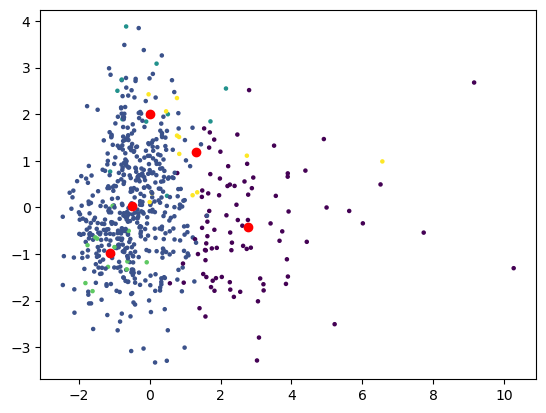

In [47]:
#Kmeans with 4 clusters
model = KMeans(5)
model.fit(df_scaled)

#create a df with the original data but with the assigned cluster label
df_with_clusters = cluster_data_df.copy()
df_with_clusters['label'] = model.predict(df_scaled)

pca = PCA(n_components=2).set_output(transform="pandas")
df_pca = pca.fit_transform(df_scaled) #enconded and scaled data (that was passed into clustering algo)

df_pca_with_clusters = df_pca.copy()
df_pca_with_clusters['label'] = df_with_clusters['label']

#to visualize centroids in PCA space, we also need to transform them.
pca_centroids = pca.transform(model.cluster_centers_)

plt.scatter(df_pca_with_clusters['pca0'], df_pca_with_clusters['pca1'], c=df_pca_with_clusters['label'], s=5)
plt.scatter(pca_centroids['pca0'], pca_centroids['pca1'], c='red')


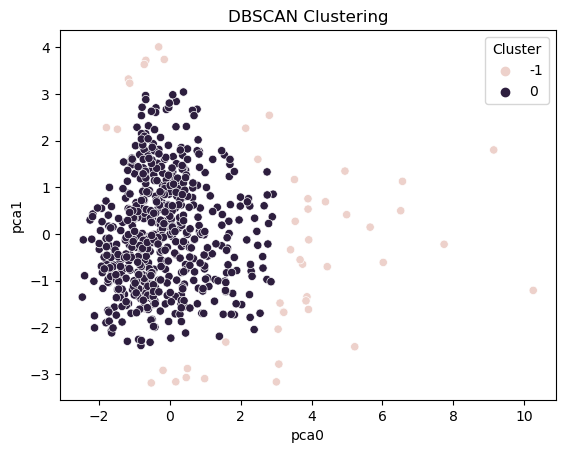

In [34]:
# plot DBSCAN clustering

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN



# Select the columns for clustering
selected_columns = ['pca0', 'pca1']

# Extract the selected columns as the feature matrix
X = df_pca[selected_columns]

# Set the parameters for DBSCAN
eps = 0.5  # The maximum distance between two samples to be considered as in the same neighborhood
min_samples = 5  # The minimum number of samples in a neighborhood for a point to be considered as a core point

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X)

# Add cluster labels to the DataFrame
df_pca['Cluster'] = cluster_labels

# Visualize the clustering results
sns.scatterplot(x='pca0', y='pca1', hue='Cluster', data=df_pca)

# Add labels and title
plt.xlabel('pca0')
plt.ylabel('pca1')
plt.title('DBSCAN Clustering')

# Display the plot
plt.show()

In [38]:
#reprint encoded and scaled data
df_scaled.head()

,cust_id,avg(amount/tran),credit_balance,savings_balance,checking_balance,income,age,years_with_bank,nbr_children,city_name_Albuquerque,...,city_name_St Louis,city_name_St Paul,city_name_Tampa,city_name_Toledo,city_name_Tucson,city_name_Tulsa,city_name_Virginia Beach,city_name_Washington,city_name_Wichita,gender_M
0,-1.713821,0.006276,-0.659356,0.209894,-0.384897,1.303330,-0.505884,-0.303070,1.180344,-0.104993,...,-0.088596,-0.088596,-0.055902,-0.088596,-0.104993,-0.104993,-0.039498,-0.097129,-0.055902,1.188921
1,-1.700297,0.407227,-0.385498,0.739195,-0.376838,-0.580153,-0.028816,-0.674388,-0.632529,-0.104993,...,-0.088596,-0.088596,-0.055902,-0.088596,-0.104993,-0.104993,-0.039498,-0.097129,-0.055902,-0.841099
2,-1.696916,0.039221,0.186369,-0.463189,-0.424306,0.002690,-0.929945,0.068249,-0.632529,-0.104993,...,-0.088596,-0.088596,-0.055902,-0.088596,-0.104993,-0.104993,-0.039498,-0.097129,-0.055902,-0.841099
3,-1.693535,-0.605156,-0.675017,-0.397330,2.687645,-0.550266,1.773444,0.810885,-0.632529,-0.104993,...,-0.088596,-0.088596,-0.055902,-0.088596,-0.104993,-0.104993,-0.039498,-0.097129,-0.055902,-0.841099
4,-1.690154,-0.200077,0.537368,-0.455886,0.867159,-0.739182,1.508406,-1.045707,-0.632529,-0.104993,...,-0.088596,-0.088596,-0.055902,-0.088596,-0.104993,-0.104993,-0.039498,-0.097129,-0.055902,1.188921


In [39]:
#these are the coefficients used for each PC (in the linear combination calculation).
pca.components_

array([[-0.01183552,  0.45820695,  0.36201946,  0.25853238,  0.35022908,
         0.5256911 ,  0.18516484,  0.06295879,  0.19641114,  0.01040014,
        -0.03379085,  0.00669079, -0.00622369, -0.01518141,  0.03064759,
        -0.01330663,  0.03527076,  0.01183661,  0.01547045,  0.08579025,
        -0.04151312, -0.01126066, -0.0274416 , -0.00079416, -0.05724281,
         0.07949752, -0.01052743,  0.02947626,  0.01629622, -0.02870216,
         0.06060376, -0.00687457, -0.04962502,  0.0125333 ,  0.00115753,
         0.02746779, -0.03511733,  0.01091157, -0.00375613, -0.01822118,
        -0.04392043,  0.00619347, -0.04277666, -0.00155355, -0.04769807,
         0.10888031, -0.0475476 , -0.02327421, -0.01440313, -0.01741136,
         0.00853501,  0.04609578,  0.03310179,  0.00652383, -0.0069368 ,
        -0.02360418, -0.00437951, -0.01022671,  0.0155226 , -0.01969833,
         0.00458273, -0.02751103, -0.06483667,  0.02338375, -0.05247598,
        -0.03011612,  0.00522005, -0.04188593, -0.0

In [40]:
df_encoded.head()

,cust_id,avg(amount/tran),credit_balance,savings_balance,checking_balance,income,age,years_with_bank,nbr_children,city_name_Albuquerque,...,city_name_St Louis,city_name_St Paul,city_name_Tampa,city_name_Toledo,city_name_Tucson,city_name_Tulsa,city_name_Virginia Beach,city_name_Washington,city_name_Wichita,gender_M
0,1362480,269.266706,20.00,1187.97,86.86,50890,33,3,2,0,...,0,0,0,0,0,0,0,0,0,1
1,1362484,381.386000,369.72,2122.17,95.32,10053,42,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1362485,278.479306,1100.00,0.00,45.49,22690,25,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1362486,98.289600,0.00,116.24,3312.27,10701,76,6,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1362487,211.563389,1548.23,12.89,1401.21,6605,71,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
cluster_0_means = df_encoded[df_with_clusters['label']==0].mean()
cluster_1_means = df_encoded[df_with_clusters['label']==1].mean()
cluster_2_means = df_encoded[df_with_clusters['label']==2].mean()
cluster_3_means = df_encoded[df_with_clusters['label']==3].mean()

means = pd.DataFrame([cluster_0_means, cluster_1_means, cluster_2_means, cluster_3_means])
means

,cust_id,avg(amount/tran),credit_balance,savings_balance,checking_balance,income,age,years_with_bank,nbr_children,city_name_Albuquerque,...,city_name_St Louis,city_name_St Paul,city_name_Tampa,city_name_Toledo,city_name_Tucson,city_name_Tulsa,city_name_Virginia Beach,city_name_Washington,city_name_Wichita,gender_M
0,1.362983e+06,201.681287,654.453390,575.297528,308.115206,16970.372659,41.977528,3.767790,0.571161,0.009363,...,0.007491,0.007491,0.003745,0.009363,0.011236,0.007491,0.000000,0.011236,0.003745,0.383895
1,1.363096e+06,267.675388,631.461000,886.246000,125.217000,22523.000000,34.900000,3.200000,1.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000
2,1.362998e+06,626.203312,2016.471429,2130.335306,1524.250306,53491.051020,46.408163,4.142857,1.346939,0.020408,...,0.010204,0.010204,0.000000,0.000000,0.010204,0.030612,0.010204,0.000000,0.000000,0.561224
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
